<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/hpdp/WATERMILON/vaex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7: Comparative Analysis of Data Analysis Libraries - Vaex
<a target="_blank" href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/hpdp/WATERMILON/vaex.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In this assignment, we aim to analyze a substantial dataset, specifically the [UK Property Price data from 1995 to April 2023](https://www.kaggle.com/datasets/willianoliveiragibin/uk-property-price-data-1995-2023-04). Our primary focus is on employing Modin as the primary tool for data cleaning, data visualization, and addressing various analytical questions. The objective is to demonstrate the efficiency and effectiveness of Modin in handling large datasets when compared to other libraries.

## Group Information
**Group Name**: WATERMILON

**Group Members:**

| Name                | Matrix Number | Task   |
| ------------------- | ------------- | ------ |
| NG ZI XING          | A21EC0213     | Modin  |
| LOO ZHI YUAN        | A21EC0197     | Vaex   |
| YEW RUI XIANG       | A21EC0149     | Dask   |
| SAM CHIA YUN        | A21EC0127     | Vaex   |

## About the Data

The dataset under consideration provides comprehensive information on property sales in England and Wales. Sourced from the UK government's HM Land Registry, it furnishes valuable insights into property transactions, encompassing sale prices, locations, and property types. Analysts, researchers, and businesses can leverage this dataset to comprehend market trends, property valuations, and identify investment opportunities within the real estate sector of England and Wales.

### Columns Explanation

- **Postcode:** The postal code denoting the property's location.
- **PAON (Primary Addressable Object Name):** Typically the house number or name.
- **SAON (Secondary Addressable Object Name):** Additional information if the building is divided into flats or sub-buildings.
- **Street:** The street name where the property is situated.
- **Locality:** Supplementary locality information.
- **Town/City:** The town or city where the property is positioned.
- **District:** The district in which the property is situated.
- **County:** The county where the property is located.
- **Price Paid:** The amount for which the property was sold.

This information will serve as the foundation for our analysis, showcasing the prowess of Modin in managing extensive datasets in comparison to other libraries.

## Downloading the Dataset

**Upload Kaggle.json File:**

> Please upload your `kaggle.json` file, which contains your username and API key.

In [ ]:
# Upload kaggle.json API token, and download / unzip csv
from google.colab import files
files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chiayunsam","key":"ce4b5d7a14a925d9685b17e9d684e76c"}'}

**Download the Data:**

Let's initiate the process by acquiring the dataset.

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d willianoliveiragibin/uk-property-price-data-1995-2023-04

100% 1.35G/1.36G [00:13<00:00, 133MB/s]
100% 1.36G/1.36G [00:13<00:00, 109MB/s]


In [ ]:
!unzip uk-property-price-data-1995-2023-04.zip

Archive:  uk-property-price-data-1995-2023-04.zip
  inflating: 202304.csv              


## Data Preparation and Cleaning
In the process of preparing and cleaning the data, the following steps will be undertaken:

- **Related Package Loading:**
  Including upgrade pandas, dask and modin

- **Dataset Loading:**
  Load the dataset to initiate the data preparation phase.

- **Data Quality Enhancement:**
  Address issues related to missing, incorrect, and invalid data to enhance the overall quality of the dataset.

- **Additional Data Manipulation:**
  Execute supplementary steps such as date parsing, column creation

In [ ]:
!pip install vaex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 93.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 98.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 116.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 68.6 MB/s eta 0:0

Import the required library so that we can continue with the Big Data Operations.

In [ ]:
import vaex
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

Defining a list of column names that will be used to rename the columns of the DataFrame. Then, read the dataset CSV File into Vaex Dataframe while specifying the size of each chunk of data to be read into memory at a time. The loop will  iterates over the colnames list and renames the columns of the DataFrame.

In [ ]:
%%time

colnames=['Transaction_unique_identifier', 'price', 'Date_of_Transfer', 'postcode', 'Property_Type',
          'Old/New', 'Duration', 'PAON', 'SAON', 'Street', 'Locality', 'Town/City', 'District', 'County', 'PPDCategory_Type','Record_Status - monthly_file_only']

df = vaex.from_csv('/content/202304.csv', convert=True, header = None, chunk_size=1_000_000 )
df = vaex.open("/content/*.hdf5")

for i, c in enumerate(colnames):
  df.rename(str(i),c)

CPU times: user 2min 32s, sys: 31.3 s, total: 3min 4s
Wall time: 3min 55s


The head() method is then used to display the first few rows of the DataFrame, providing a quick overview of the dataset's structure and content.

In [ ]:
df.head()

#,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only
0,{F887F88E-7D15-4415-804E-52EAC2F10958},70000,1995-07-07 00:00,MK15 9HP,D,N,F,31,--,ALDRICH DRIVE,WILLEN,MILTON KEYNES,MILTON KEYNES,MILTON KEYNES,A,A
1,{40FD4DF2-5362-407C-92BC-566E2CCE89E9},44500,1995-02-03 00:00,SR6 0AQ,T,N,F,50,--,HOWICK PARK,SUNDERLAND,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A
2,{7A99F89E-7D81-4E45-ABD5-566E49A045EA},56500,1995-01-13 00:00,CO6 1SQ,T,N,F,19,--,BRICK KILN CLOSE,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX,A,A
3,{28225260-E61C-4E57-8B56-566E5285B1C1},58000,1995-07-28 00:00,B90 4TG,T,N,F,37,--,RAINSBROOK DRIVE,SHIRLEY,SOLIHULL,SOLIHULL,WEST MIDLANDS,A,A
4,{444D34D7-9BA6-43A7-B695-4F48980E0176},51000,1995-06-28 00:00,DY5 1SA,S,N,F,59,--,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS,A,A
5,{AE76CAF1-F8CC-43F9-8F63-4F48A2857D41},17000,1995-03-10 00:00,S65 1QJ,T,N,L,22,--,DENMAN STREET,ROTHERHAM,ROTHERHAM,ROTHERHAM,SOUTH YORKSHIRE,A,A
6,{709FB471-3690-4945-A9D6-4F48CE65AAB6},58000,1995-04-28 00:00,PE7 3AL,D,Y,F,4,--,BROOK LANE,FARCET,PETERBOROUGH,PETERBOROUGH,CAMBRIDGESHIRE,A,A
7,{5FA8692E-537B-4278-8C67-5A060540506D},19500,1995-01-27 00:00,SK10 2QW,T,N,L,38,--,GARDEN STREET,MACCLESFIELD,MACCLESFIELD,MACCLESFIELD,CHESHIRE,A,A
8,{E78710AD-ED1A-4B11-AB99-5A0614D519AD},20000,1995-01-16 00:00,SA6 5AY,D,N,F,592,--,CLYDACH ROAD,YNYSTAWE,SWANSEA,SWANSEA,SWANSEA,A,A
9,{1DFBF83E-53A7-4813-A37C-5A06247A09A8},137500,1995-03-31 00:00,NR2 2NQ,D,N,F,26,--,LIME TREE ROAD,NORWICH,NORWICH,NORWICH,NORFOLK,A,A


We use df.info() to quickly assessing the size of the DataFrame and the types of data it contains. This could provide a comprehensive overview of the DataFrame's structure and contents, making it useful for understanding the data's characteristics

In [ ]:
%%time
df.info()

column,type,unit,description,expression
Transaction_unique_identifier,str,,,
price,int64,,,
Date_of_Transfer,str,,,
postcode,str,,,
Property_Type,str,,,
Old/New,str,,,
Duration,str,,,
PAON,str,,,
SAON,str,,,
Street,str,,,


CPU times: user 15.7 ms, sys: 0 ns, total: 15.7 ms
Wall time: 17.5 ms


Dropping columns from the DataFrame. After executing the code, the DataFrame will no longer contain the columns "Transaction_unique_identifier" and "Record_Status - monthly_file_only".

In [ ]:
%%time

columns_to_drop = ["Transaction_unique_identifier", "Record_Status - monthly_file_only"]
df = df.drop(columns_to_drop)


CPU times: user 1.07 ms, sys: 14 µs, total: 1.09 ms
Wall time: 1.09 ms


The head() method is then used to display the first few rows of the DataFrame, providing a quick overview of the dataset's structure and content.

In [ ]:
df.head()

#,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type
0,70000,1995-07-07 00:00,MK15 9HP,D,N,F,31,--,ALDRICH DRIVE,WILLEN,MILTON KEYNES,MILTON KEYNES,MILTON KEYNES,A
1,44500,1995-02-03 00:00,SR6 0AQ,T,N,F,50,--,HOWICK PARK,SUNDERLAND,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A
2,56500,1995-01-13 00:00,CO6 1SQ,T,N,F,19,--,BRICK KILN CLOSE,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX,A
3,58000,1995-07-28 00:00,B90 4TG,T,N,F,37,--,RAINSBROOK DRIVE,SHIRLEY,SOLIHULL,SOLIHULL,WEST MIDLANDS,A
4,51000,1995-06-28 00:00,DY5 1SA,S,N,F,59,--,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS,A
5,17000,1995-03-10 00:00,S65 1QJ,T,N,L,22,--,DENMAN STREET,ROTHERHAM,ROTHERHAM,ROTHERHAM,SOUTH YORKSHIRE,A
6,58000,1995-04-28 00:00,PE7 3AL,D,Y,F,4,--,BROOK LANE,FARCET,PETERBOROUGH,PETERBOROUGH,CAMBRIDGESHIRE,A
7,19500,1995-01-27 00:00,SK10 2QW,T,N,L,38,--,GARDEN STREET,MACCLESFIELD,MACCLESFIELD,MACCLESFIELD,CHESHIRE,A
8,20000,1995-01-16 00:00,SA6 5AY,D,N,F,592,--,CLYDACH ROAD,YNYSTAWE,SWANSEA,SWANSEA,SWANSEA,A
9,137500,1995-03-31 00:00,NR2 2NQ,D,N,F,26,--,LIME TREE ROAD,NORWICH,NORWICH,NORWICH,NORFOLK,A


Looping through each column in the Vaex DataFrame, calculating the fraction of missing values in each column, and printing the column name along with its missing fraction. This is am important step so that we can determine which column should be dropped before continue to the Big Data Operation.

In [ ]:
%%time

for column in df.column_names:
    missing_fraction = df[column].isna().mean(progress='widget')
    print(f"Column '{column}': {missing_fraction}")


Column 'price': 0.0


Column 'Date_of_Transfer': 0.0


Column 'postcode': 0.0016257118877383504


Column 'Property_Type': 0.0


Column 'Old/New': 0.0


Column 'Duration': 0.0


Column 'PAON': 0.00014814564375418106


Column 'SAON': 0.8823796441307518


Column 'Street': 0.01583506824177539


Column 'Locality': 0.35669011439573906


Column 'Town/City': 0.0


Column 'District': 0.0


Column 'County': 0.0


Column 'PPDCategory_Type': 0.0
CPU times: user 2.27 s, sys: 114 ms, total: 2.39 s
Wall time: 2.6 s


Due to the high proportion of missing values (approximately 90%) in the SAON column, it is advisable to remove this column from the dataset. Similarly, the Locality column contains redundant information that duplicates other location-related data, making it suitable for removal as well. To handle missing values in other columns, a simple strategy is to replace them with a placeholder denoted as "UNK," effectively marking them as unknown. For columns containing numeric data like PAON, the null values can be replaced with zeros to maintain consistency.

In [ ]:
%%time

columns_to_drop = ["SAON", "Locality"]
df = df.drop(columns_to_drop)


CPU times: user 2.19 ms, sys: 0 ns, total: 2.19 ms
Wall time: 2.32 ms


In [ ]:
%%time


df.fillna(value="UNK", column_names=["postcode"], inplace=True)
df.fillna(value="0", column_names=["PAON"], inplace=True)
df.fillna(value="UNK", column_names=["Street"], inplace=True)


CPU times: user 4.55 ms, sys: 513 µs, total: 5.06 ms
Wall time: 6.29 ms


#,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,Street,Town/City,District,County,PPDCategory_Type
0,70000,1995-07-07 00:00,MK15 9HP,D,N,F,31,ALDRICH DRIVE,MILTON KEYNES,MILTON KEYNES,MILTON KEYNES,A
1,44500,1995-02-03 00:00,SR6 0AQ,T,N,F,50,HOWICK PARK,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A
2,56500,1995-01-13 00:00,CO6 1SQ,T,N,F,19,BRICK KILN CLOSE,COLCHESTER,BRAINTREE,ESSEX,A
3,58000,1995-07-28 00:00,B90 4TG,T,N,F,37,RAINSBROOK DRIVE,SOLIHULL,SOLIHULL,WEST MIDLANDS,A
4,51000,1995-06-28 00:00,DY5 1SA,S,N,F,59,MERRY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS,A
...,...,...,...,...,...,...,...,...,...,...,...,...
"28,276,223",490000,2023-01-13 00:00,RM1 4SR,T,N,F,12,HEATHER GLEN,ROMFORD,HAVERING,GREATER LONDON,A
"28,276,224",365000,2023-01-10 00:00,SS2 4UA,F,N,L,"CENTENARY PLACE, 1",SOUTHCHURCH BOULEVARD,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA,A
"28,276,225",730000,2023-01-05 00:00,CO13 0EY,S,N,F,HIGH VIEW,LITTLE CLACTON ROAD,FRINTON-ON-SEA,TENDRING,ESSEX,A
"28,276,226",379000,2023-01-06 00:00,CO15 5NA,D,N,F,12,DULWICH ROAD,CLACTON-ON-SEA,TENDRING,ESSEX,A


Reviewing the fraction result again after we cleaning it.

In [ ]:
%%time

for column in df.column_names:
    missing_fraction = df[column].isna().mean(progress='widget')
    print(f"Column '{column}': {missing_fraction}")

Column 'price': 0.0


Column 'Date_of_Transfer': 0.0


Column 'postcode': 0.0


Column '__postcode': 0.0016257118877383504


Column 'Property_Type': 0.0


Column 'Old/New': 0.0


Column 'Duration': 0.0


Column 'PAON': 0.0


Column '__PAON': 0.00014814564375418106


Column 'Street': 0.0


Column '__Street': 0.01583506824177539


Column 'Town/City': 0.0


Column 'District': 0.0


Column 'County': 0.0


Column 'PPDCategory_Type': 0.0
CPU times: user 3.28 s, sys: 122 ms, total: 3.41 s
Wall time: 2.51 s


Converting the 'Date_of_Transfer' column to datetime data type allowing us to perform datetime-related operations and analysis

In [ ]:
df['Date_of_Transfer'] = df['Date_of_Transfer'].astype('datetime64[ns]')

Convert the Date of Transfer column into two separate columns for the year and month. Exclude detailed information beyond the month, as it is not required for our analysis.

In [ ]:
df["year"] = df["Date_of_Transfer"].dt.year
df["month"] = df["Date_of_Transfer"].dt.month

df.drop("Date_of_Transfer", inplace = True)

#,price,postcode,Property_Type,Old/New,Duration,PAON,Street,Town/City,District,County,PPDCategory_Type,year,month
0,70000,MK15 9HP,D,N,F,31,ALDRICH DRIVE,MILTON KEYNES,MILTON KEYNES,MILTON KEYNES,A,1995,7
1,44500,SR6 0AQ,T,N,F,50,HOWICK PARK,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,1995,2
2,56500,CO6 1SQ,T,N,F,19,BRICK KILN CLOSE,COLCHESTER,BRAINTREE,ESSEX,A,1995,1
3,58000,B90 4TG,T,N,F,37,RAINSBROOK DRIVE,SOLIHULL,SOLIHULL,WEST MIDLANDS,A,1995,7
4,51000,DY5 1SA,S,N,F,59,MERRY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS,A,1995,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"28,276,223",490000,RM1 4SR,T,N,F,12,HEATHER GLEN,ROMFORD,HAVERING,GREATER LONDON,A,2023,1
"28,276,224",365000,SS2 4UA,F,N,L,"CENTENARY PLACE, 1",SOUTHCHURCH BOULEVARD,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA,A,2023,1
"28,276,225",730000,CO13 0EY,S,N,F,HIGH VIEW,LITTLE CLACTON ROAD,FRINTON-ON-SEA,TENDRING,ESSEX,A,2023,1
"28,276,226",379000,CO15 5NA,D,N,F,12,DULWICH ROAD,CLACTON-ON-SEA,TENDRING,ESSEX,A,2023,1


We use df.info() to quickly assessing the size of the DataFrame and the types of data it contains.

In [ ]:
df.info()

column,type,unit,description,expression
price,int64,,,
postcode,virtual column,,,"fillna(__postcode, 'UNK')"
Property_Type,str,,,
Old/New,str,,,
Duration,str,,,
PAON,virtual column,,,"fillna(__PAON, '0')"
Street,virtual column,,,"fillna(__Street, 'UNK')"
Town/City,str,,,
District,str,,,
County,str,,,


## Exploratory Analysis and Visualization


In this session, we will perform exploratory data analysis by investigating the contents or values of specific columns. Our goal is to explore the overall relationships between particular columns and property prices, extracting insights that could raise intriguing questions for deeper exploration in the next session.



Upon observation, we note that the mean property price is around \$218,000, whereas the median is \$150,000. This significant difference indicates a potential right-skewed distribution in the price data. As a result, our initial inquiry is: What is the coefficient of skewness for the property prices?

In [ ]:
%%time

df.describe()

CPU times: user 9.97 s, sys: 212 ms, total: 10.2 s
Wall time: 5.76 s


,price,postcode,Property_Type,Old/New,Duration,PAON,Street,Town/City,District,County,PPDCategory_Type,year,month
data_type,int64,string,string,string,string,string,string,string,string,string,string,int64,int64
count,28276228,28276228,28276228,28276228,28276228,28276228,28276228,28276228,28276228,28276228,28276228,28276228,28276228
NA,0,0,0,0,0,0,0,0,0,0,0,0,0
mean,218130.49009903302,--,--,--,--,--,--,--,--,--,--,2008.1484105305701,6.768895377417384
std,868852.434325,--,--,--,--,--,--,--,--,--,--,8.178055,3.353059
min,1,--,--,--,--,--,--,--,--,--,--,1995,1
max,594300000,--,--,--,--,--,--,--,--,--,--,2023,12


As expected, the price demonstrates a strongly right-skewed distribution, suggesting the existence of outliers in the higher price range.

CPU times: user 15.7 s, sys: 1.86 s, total: 17.5 s
Wall time: 16.7 s


<Axes: >

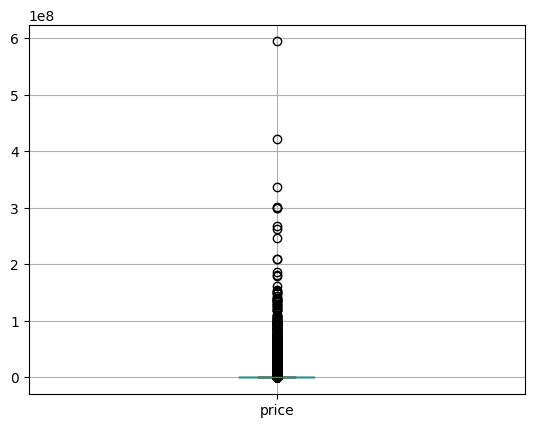

In [ ]:
%%time
df.sample(frac = 0.2).to_pandas_df().boxplot(column = ["price"])

In order to maintain data impartiality and prevent regional bias, it's crucial to equalize the representation of data from each country. A pie chart representation demonstrates a fairly even distribution of samples across most countries, raising questions about the influence of country on property prices. Notably, Greater London stands out due to its larger sample size, prompting us to consider a more focused exploration of property prices in Greater London for additional insights.

CPU times: user 2.44 s, sys: 79 ms, total: 2.52 s
Wall time: 2.62 s


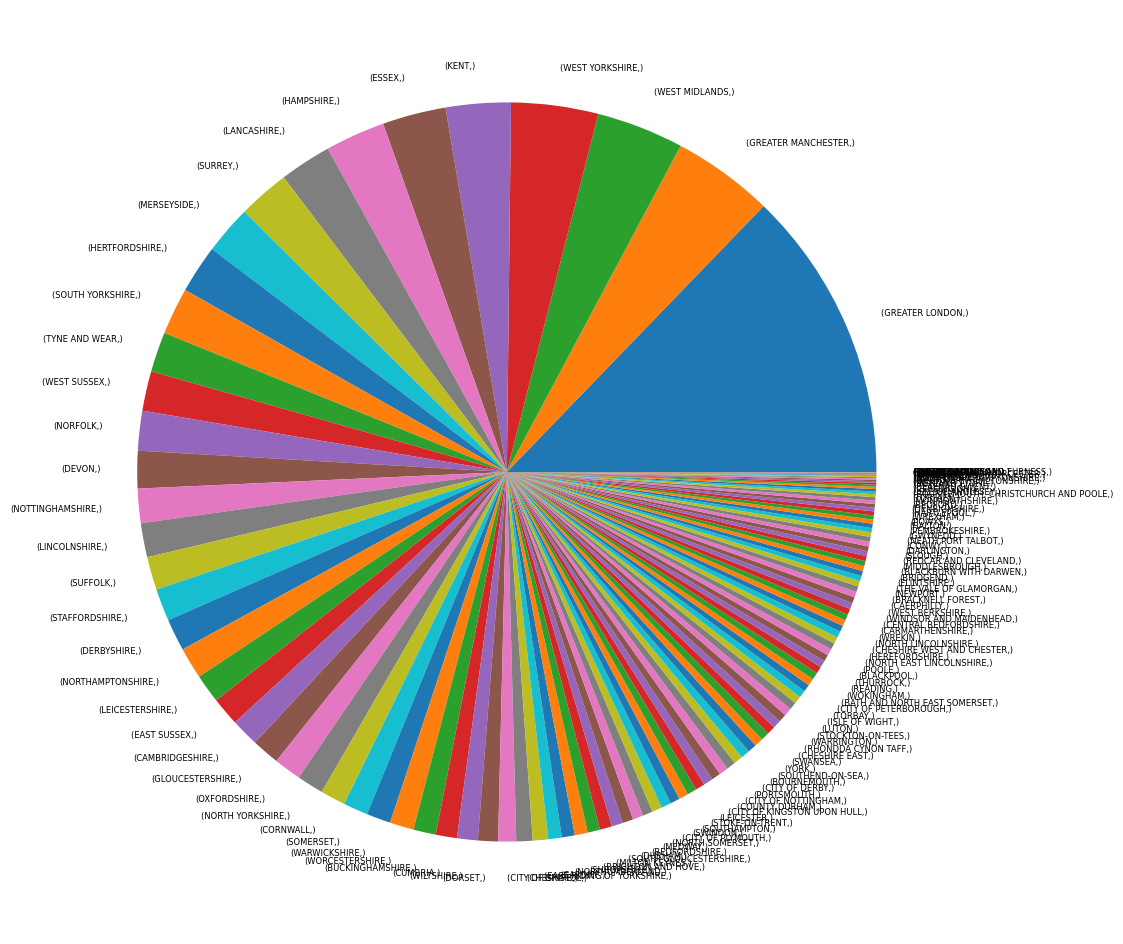

In [ ]:
%%time
ax = df.sample(frac = 0.1).to_pandas_df(['County']).value_counts().plot.pie(figsize = (15,12), fontsize = 6)

Acknowledging the significance of the class count in a column, we have determined the unique value counts for three columns: Duration, Old/New, and PPDCategory Type. The findings indicate that Duration has three classes, whereas Old/New and PPDCategory_Type each have two classes. The subsequent inquiry involves investigating how these classes impact property prices. Due to the limited unique values, we plan to use a bar chart in the next session to further explore this analysis.

CPU times: user 3.54 s, sys: 625 ms, total: 4.16 s
Wall time: 4.17 s


<Axes: >

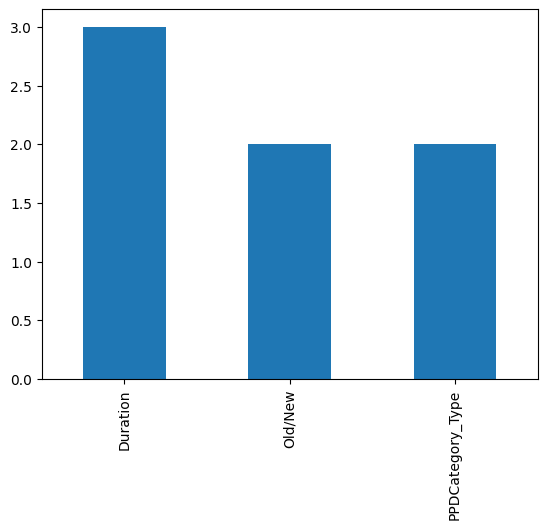

In [ ]:
%%time

pandas_df = df.to_pandas_df(["Duration", "Old/New", "PPDCategory_Type"])
count = pandas_df.apply(lambda x : x.unique().shape[0] )
count.plot.bar()


It is commonly understood that property type is likely to have a substantial impact on property prices. To investigate this connection, we can generate a box plot displaying property prices according to different property types. The plot illustrates noticeable differences in price distribution across property types. However, for a more in-depth understanding of price levels, we will address this aspect in the following section.

CPU times: user 4.25 s, sys: 75.8 ms, total: 4.32 s
Wall time: 4.34 s


<Axes: title={'center': 'price'}, xlabel='[Property_Type]'>

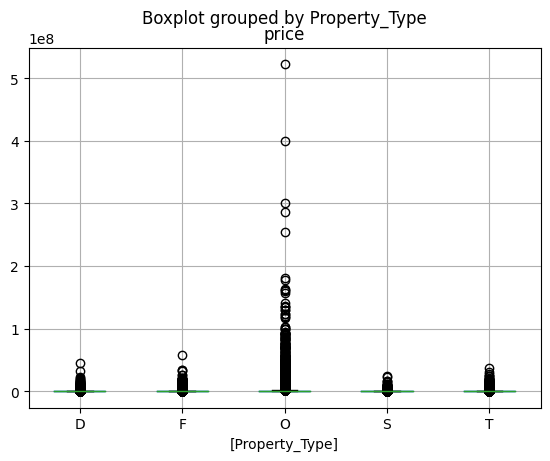

In [ ]:
%%time
df[["Property_Type", "price"]].sample(frac = 0.1).to_pandas_df().boxplot(by = "Property_Type")

## Asking and Answering Questions

In this session, the following part will be done:
1. **6 insightful questions about the dataset:**
2. **Answer the questions using Numpy/Pandas computations or by plotting graphs with Matplotlib/Seaborn and sklearn:**
3. **Perform necessary data manipulations based on previous findings:**

### To what degree is the price distribution skewed?

> **Solution:** Calculate the coefficient of skewness for property prices.

> **Answer:** While an exponential distribution typically has a skewness of 2, the skewness for property prices is approximately 90 times higher, indicating a highly right-skewed distribution. This implies that the median is a more reliable estimator than the mean in this context. Moreover, it suggests that property prices are not uniformly distributed worldwide, highlighting a disparity between affluent and less affluent segments of the population.

In [ ]:
%%time

df["price"].skew()

CPU times: user 2.55 s, sys: 7 µs, total: 2.55 s
Wall time: 1.32 s


array(183.55846728)

### Does the country where the property is located significantly influence its price?

> **Solution:** Given the diverse presence of countries in the dataset, traditional plotting may not be suitable. Instead, apply mutual information regression to quantify the contribution of country information to the price.

> **Answer:** The mutual information between the country and price is 0.01, indicating a relationship between them, although the impact is not significant. This suggests that while the country is a contributing factor, it is not the sole determinant of property prices.

In [ ]:
%%time
from sklearn.feature_selection import mutual_info_regression

test_data = df[["County", "price"]].sample(frac = 0.1).to_pandas_df()
mutual_info_regression( np.expand_dims( pd.factorize( test_data["County"] )[0], axis = 1), test_data["price"])

CPU times: user 57.3 s, sys: 484 ms, total: 57.8 s
Wall time: 58.7 s


array([0.01568477])

In [ ]:
del test_data

In [ ]:
df.head()

#,price,postcode,Property_Type,Old/New,Duration,PAON,Street,Town/City,District,County,PPDCategory_Type,year,month
0,70000,MK15 9HP,D,N,F,31,ALDRICH DRIVE,MILTON KEYNES,MILTON KEYNES,MILTON KEYNES,A,1995,7
1,44500,SR6 0AQ,T,N,F,50,HOWICK PARK,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,1995,2
2,56500,CO6 1SQ,T,N,F,19,BRICK KILN CLOSE,COLCHESTER,BRAINTREE,ESSEX,A,1995,1
3,58000,B90 4TG,T,N,F,37,RAINSBROOK DRIVE,SOLIHULL,SOLIHULL,WEST MIDLANDS,A,1995,7
4,51000,DY5 1SA,S,N,F,59,MERRY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS,A,1995,6
5,17000,S65 1QJ,T,N,L,22,DENMAN STREET,ROTHERHAM,ROTHERHAM,SOUTH YORKSHIRE,A,1995,3
6,58000,PE7 3AL,D,Y,F,4,BROOK LANE,PETERBOROUGH,PETERBOROUGH,CAMBRIDGESHIRE,A,1995,4
7,19500,SK10 2QW,T,N,L,38,GARDEN STREET,MACCLESFIELD,MACCLESFIELD,CHESHIRE,A,1995,1
8,20000,SA6 5AY,D,N,F,592,CLYDACH ROAD,SWANSEA,SWANSEA,SWANSEA,A,1995,1
9,137500,NR2 2NQ,D,N,F,26,LIME TREE ROAD,NORWICH,NORWICH,NORFOLK,A,1995,3


### How does the district affect the price and its dispersion in property?

> **Solution:** Generate two charts depicting the mean and standard deviation of property prices for each district. For illustrative purposes, we focus on districts within the Greater London country.

> **Answer:** The pattern observed in both charts shows a striking similarity. Districts with higher average prices also demonstrate greater variability in prices. This suggests that in districts with higher property values, there is a more noticeable difference in property prices across various properties within the district. The City of London stands out in both having the highest property prices and the highest standard deviation.

CPU times: user 1.89 s, sys: 154 ms, total: 2.05 s
Wall time: 1.64 s


array([<Axes: title={'center': '(price, mean)'}, xlabel='District'>,
       <Axes: title={'center': '(price, std)'}, xlabel='District'>],
      dtype=object)

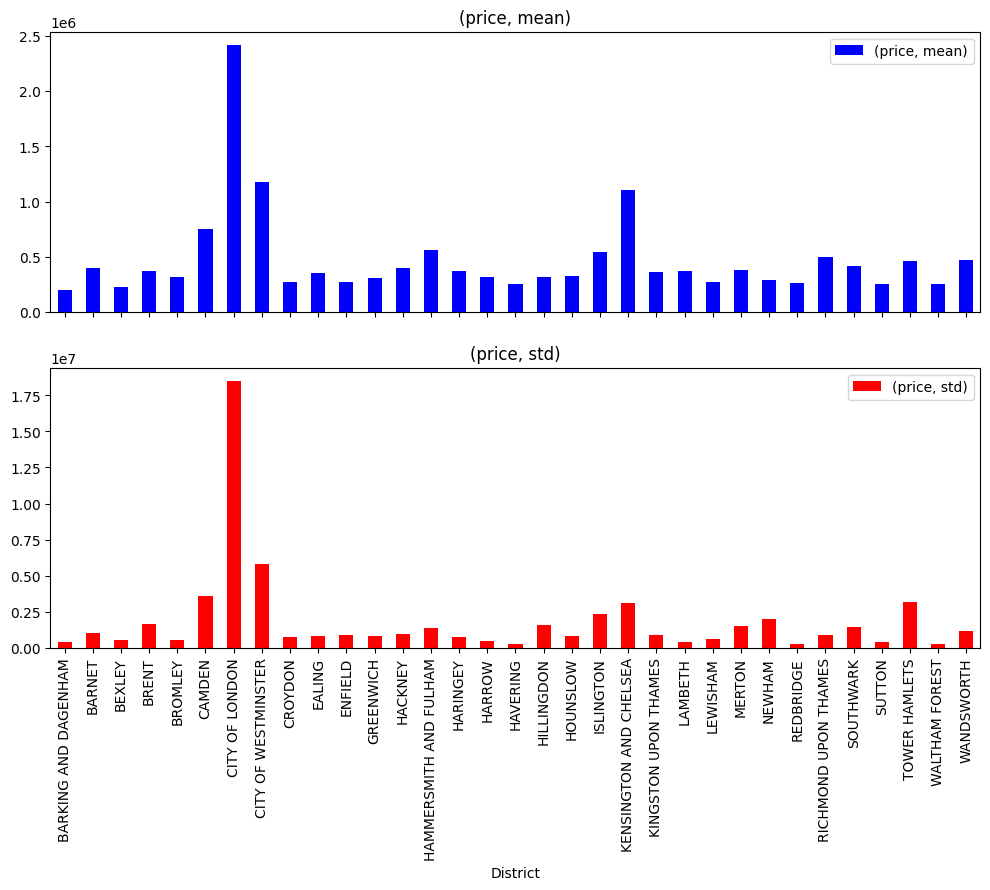

In [ ]:
%%time
test_data = df[df["County"] == "GREATER LONDON"].sample(frac = 0.1).to_pandas_df(["District", "price"])
test_data = test_data.groupby("District").agg({"price" : ["mean", "std"]})
test_data.plot.bar(subplots = True, color = ["blue", "red"], figsize = (12, 8))

In [ ]:
del test_data

### How does the combination of PPDCategory_Type and Old/New property status influence property prices?

> **Solution:** Create a visualization by plotting the median property prices against PPDCategory_Type and Old/New.

> **Answer:**
One intriguing finding is that the price of new properties consistently stays the highest regardless of the duration of property transfers.

CPU times: user 2.45 s, sys: 172 ms, total: 2.62 s
Wall time: 2.62 s


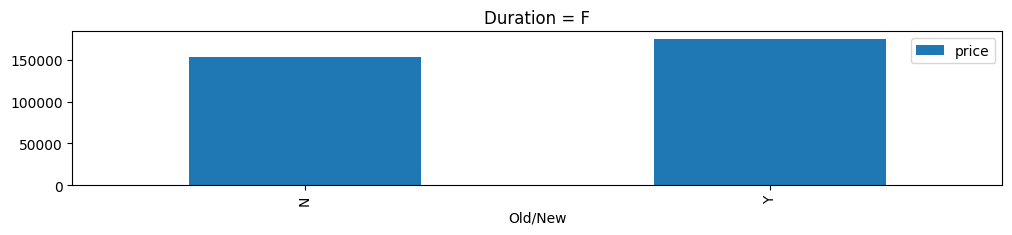

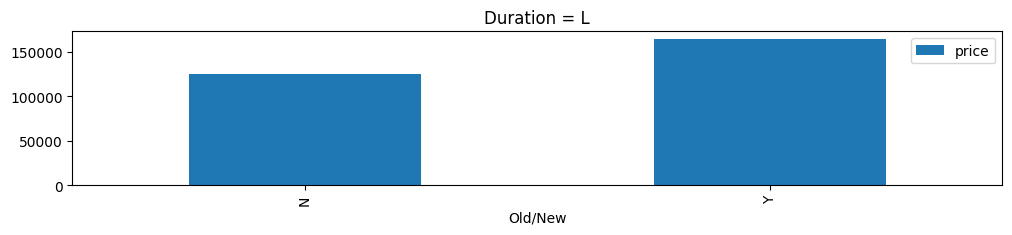

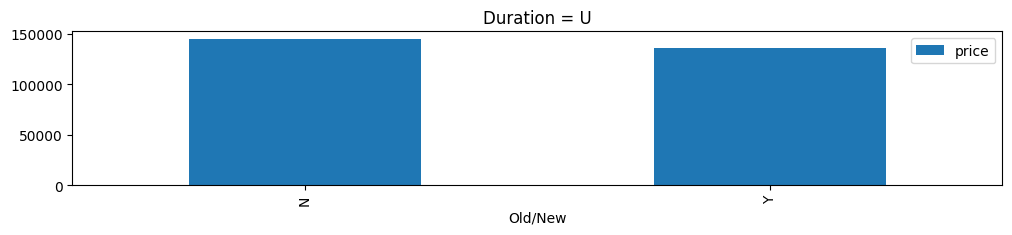

In [ ]:
%%time
test_data = df[["price", "Duration", "Old/New"]].sample(frac = 0.1).to_pandas_df()
test_data = test_data.groupby(["Duration", "Old/New"], as_index = False).median()

ax = test_data.groupby("Duration").plot( x = "Old/New", y = "price", kind = "bar", figsize = (12, 2))
for title, a in dict(ax).items():
  a.set_title(f"Duration = {title}")

### What is the trend in property prices over time?

> **Solution:** Create a line plot of property prices over time, with each line representing a month.

> **Answer:** The graph demonstrates a typical upward trend in property prices over time, as anticipated. However, the notable observation is the fluctuation of prices within the same year, indicating a growing dispersion. Prior to approximately 2012, most lines followed a similar pattern, but the dispersion expanded over time. Some lines displayed price rises, while others depicted declines within the same year.

CPU times: user 39.3 s, sys: 1.98 s, total: 41.3 s
Wall time: 40.7 s


<Axes: xlabel='year', ylabel='price'>

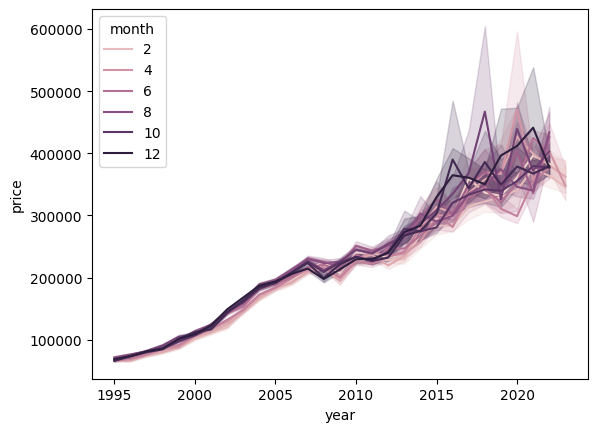

In [ ]:
%%time
sns.lineplot(data = df.sample(frac = 0.1).to_pandas_df(), x = "year", y = "price", hue = "month")

### How does the price of property vary based on different property types over time?

> **Solution:** Create a line plot of property prices over the years, with each line representing a different property type.

> **Answer:** Upon examination, it becomes clear that Type O properties consistently maintain the highest prices across most periods, albeit with significant fluctuations. In contrast, other property types show a more stable and steadily increasing trend over time.

CPU times: user 33.7 s, sys: 1.01 s, total: 34.7 s
Wall time: 34.3 s


<Axes: xlabel='year', ylabel='price'>

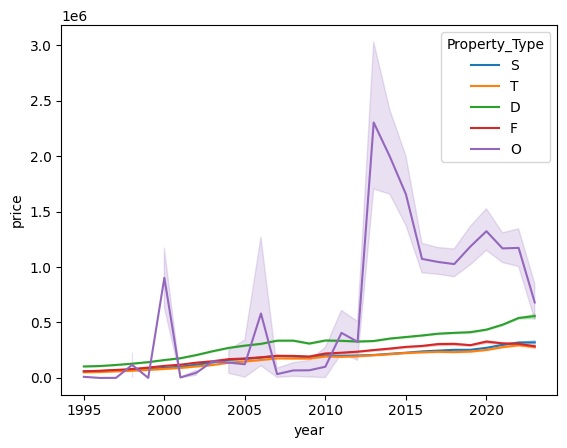

In [ ]:
%%time
sns.lineplot(data = df.sample(frac = 0.1).to_pandas_df(), x = "year", y = "price", hue = "Property_Type")

## Inferences and Conclusion
* Upon examining the distribution of property prices, we noted a substantial difference between the mean (approximately $218,000) and median ($150,000), indicating a highly right-skewed distribution. The coefficient of skewness for property prices is nearly 90 times that of an exponential distribution, highlighting the significant skewness. This emphasizes the robustness of the median as an estimator compared to the mean, underscoring the uneven distribution of property prices globally.

* Regarding the influence of location, we found that the country of property location exhibited a relationship with prices, as measured by mutual information regression. However, this influence was not considered substantial, suggesting that other factors contribute significantly to property prices. Further exploration into districts within the Greater London area revealed that higher mean prices were associated with higher standard deviations, indicating a greater disparity in property prices within districts with elevated mean prices.

* Property characteristics, particularly property type, were identified as significant influencers of prices. A box plot analysis illustrated variations among property types, prompting a closer examination of price ranges.

* When considering the combination of PPDCategory_Type and Old/New property status, we observed that new properties consistently commanded the highest prices across all property transfer durations.

* Analyzing property prices over time revealed a general upward trend, with interesting fluctuations observed within the same year. The dispersion of prices increased over the years, with some trends showing price increases and others showing decreases within the same year.

* A detailed investigation into property prices influenced by different property types over time revealed that type O properties consistently had the highest prices in most periods but also experienced high fluctuations. Other property types exhibited smoother increasing trends.

* In conclusion, this comprehensive analysis provides valuable insights into the factors influencing property prices. It underscores the need for nuanced considerations in understanding the dynamics of the real estate market.

## My Vaex Journey: Empowering Data Analysis on a Massive Dataset
* Embarking on the journey of using Vaex to process a massive dataset has been an enlightening experience. One of the most profound realizations was Vaex's ability to seamlessly integrate into existing workflows by implementing almost all general-use Pandas functions. Its decision to maintain an identical interface with Pandas is a game-changer, allowing for collaborative usage with popular libraries like Scikit-learn (sklearn) and Seaborn. This level of compatibility is particularly impressive, setting Vaex apart from alternatives like Dask.

* In contrast to Dask's lazy calculation approach, which requires explicit calls to .compute or .persist to execute operations, Vaex's consistent interface with Pandas ensures a smooth transition for users. The hassle-free interoperability with other widely-used libraries facilitates a more streamlined and efficient workflow.

* Vaex's underlying engine, powered by Dask, Ray, or other distributed computation libraries, provides a sense of freedom from concerns at the hardware level. This enables a more focused and efficient exploration of the dataset without the need to delve into low-level infrastructure details.

* However, the journey with Vaex also highlighted areas where further progress is needed. The scheduling and automation aspects, while powerful, lack the intelligence to operate seamlessly without some manual adjustments. Parameters such as n_workers and n_partition require careful tuning, and the success of the entire operation hinges on finding the right balance. This trial-and-error process can be cumbersome, especially when aiming to prevent system crashes and optimize computational efficiency.

## Future Work With Vaex

The potential future work in this analysis is extensive, presenting exciting opportunities to enhance our understanding of future property prices using Vaex. One direction involves the development of precise predictive models that can forecast property prices with a high degree of accuracy. Such models would prove immensely beneficial for investors and government entities, empowering them to strategically plan and optimize decisions for the benefit of the general public.

In particular, exploring advanced sequence models, such as Markov Chain and Recurrent Neural Network (RNN), holds great promise for addressing the complexities of predicting future property prices with Vaex. These models could leverage Vaex's capabilities to handle large datasets efficiently, enabling the analysis of extensive historical data to improve forecasting accuracy.

## References

1. Pandas Documentation - [pandas.DataFrame.plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
2. Seaborn Documentation - [seaborn.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html)
3. Vaex Documentation - [Vaex](https://github.com/vaexio/vaex)
4. Vaex Documentation - [Handling Missing Data](https://vaex.readthedocs.io/en/latest/guides/missing_or_invalid_data.html)
5. Vaex Documentation - [What is Vaex](https://vaex.readthedocs.io/en/latest/)